# Figure generation code for the book covers

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="Greys",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (5,2.5)},
)
%config InlineBackend.figure_format = 'retina'

from ministats.utils import savefigure

In [3]:
# set random seed for repeatability
np.random.seed(42)

Saved figure to figures/bookcovers/sampling_dist_and_CLT.png


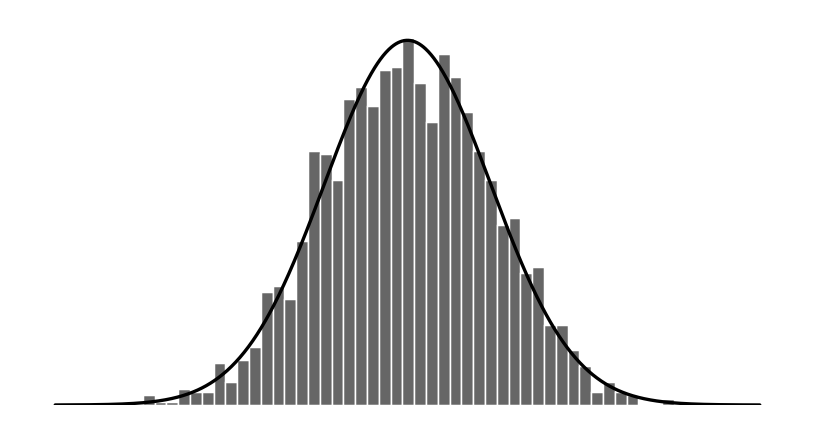

In [4]:
from ministats import gen_sampling_dist
from scipy.stats import norm


mu = 0
sigma = 1
rvZ = norm(mu, sigma)

n = 50
N = 2000
xlims=[-0.6, 0.6]

np.random.seed(450)
zbars = gen_sampling_dist(rvZ, np.mean, n=n, N=N)

# Plot
fig, ax = plt.subplots(figsize=None)
sns.histplot(zbars, binwidth=0.02, stat="density", alpha=0.6, color="k", ax=ax)
rvZbar = norm(rvZ.mean(), rvZ.std() / np.sqrt(n))
xs = np.linspace(*xlims, 1000)
sns.lineplot(x=xs, y=rvZbar.pdf(xs), ax=ax, color="k")
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel(None)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

filename = os.path.join("figures/bookcovers", "sampling_dist_and_CLT.png")
fig.savefig(filename, dpi=600, transparent=True)
print("Saved figure to", filename)

In [5]:
# from ministats import plot_sampling_dists_panel

# np.random.seed(46)
# fig = plot_sampling_dists_panel(rvZ, rv_name="Z", xlims=[-0.8, 0.8], binwidth=0.045)
# ax1, ax2, ax3 = fig.axes

# ax1.set_yticks([])
# ax1.set_ylabel(None)

# ax1.set_xticks([])
# ax2.set_xticks([])
# ax3.set_xticks([])

# ax1.get_legend().remove()
# ax2.get_legend().remove()
# ax3.get_legend().remove()
# ax1.spines['top'].set_visible(False)
# ax1.spines['bottom'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.spines['left'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax3.spines['top'].set_visible(False)
# ax3.spines['bottom'].set_visible(False)
# ax3.spines['right'].set_visible(False)
# ax3.spines['left'].set_visible(False)
# filename = os.path.join("figures/bookcovers", "sampling_dists_and_CLT_predictions.png")
# fig.savefig(filename, dpi=600, transparent=True)
# print("Saved figure to", filename)

## Part 2

In [6]:
from scipy.stats import norm
from scipy.stats import t as tdist
from ministats.probs import MixtureModel

# most men
muW = 80
sigmaW = 12
rvW1 = norm(loc=muW, scale=sigmaW)

# heavy men
rvW2 = tdist(df=4, loc=120, scale=10)

rvWpop = MixtureModel([rvW1, rvW2], weights=[0.98,0.02])

In [7]:
import numpy as np

N = 10000
np.random.seed(45)
population = rvWpop.rvs(N).round(1)

In [8]:
# population model
rvW = norm(loc=muW, scale=sigmaW)

In [9]:
# np.random.seed(44)
# np.random.seed(47)
n = 30
np.random.seed(48)
sample = np.random.choice(population, size=n, replace=False)
sample

array([ 60.1,  78.9,  79. , 104.3,  80. ,  56.8,  52.8,  78.6,  72.8,
       104.6,  75.7,  90.8,  79.1,  64.6,  59.3,  76.5,  62.9,  73.8,
        71.5,  81.2,  86.8,  67.7,  93.8,  77.8, 112.7,  80.4,  89.5,
        69.5,  89.1,  72.5])

Saved figure to figures/bookcovers/histplots_weights_pop_and_sample.png


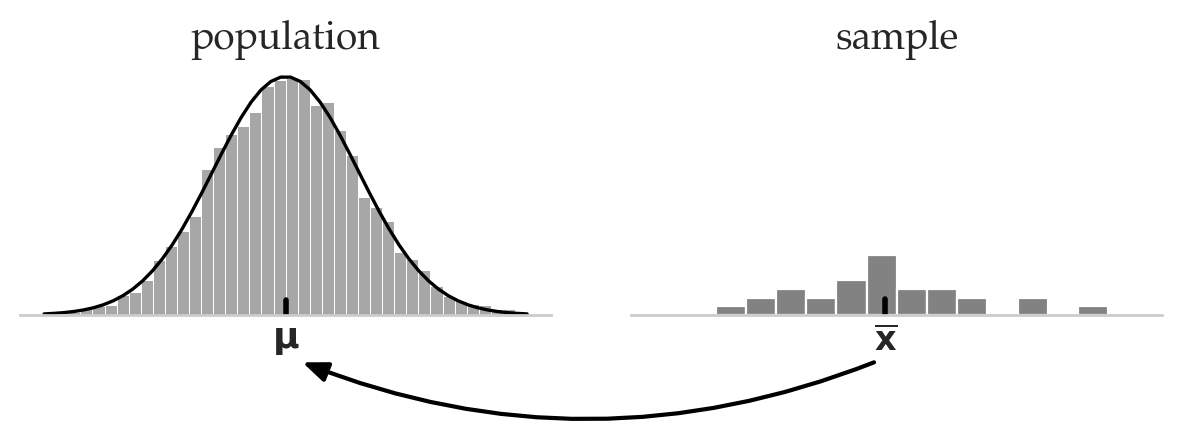

In [10]:
from matplotlib.patches import FancyArrowPatch

xlims = [40, 120]

wbar = np.mean(sample)
wstd = np.std(sample, ddof=1)

with plt.rc_context({"figure.figsize":(6,2)}):
    fig, (ax1,ax2) = plt.subplots(1,2)

    # LEFT
    # population    
    sns.histplot(population, bins=np.arange(*xlims,2), ax=ax1, stat="density", alpha=0.7, color="C9")
    ax1.set_title(f"population", fontdict={"fontsize":14})
    # population model
    ws = np.linspace(*xlims)
    sns.lineplot(x=ws, y=rvW.pdf(ws), ax=ax1, color="k")
    ax1.plot([muW, muW], [0, 0.002], color='black', lw=2)  # Short vertical tick
    ax1.text(muW, -0.001, r"$\mathbf{\mu}$", ha="center", va="top", fontsize=13)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_xlabel(None)
    ax1.set_ylabel(None)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    
    # RIGHT sample
    sns.histplot(sample, bins=range(xlims[0], xlims[1]+1,5), ax=ax2, alpha=1, color="C9")
    ax2.set_ylim([0,29])
    ax2.set_ylabel(None)
    ax2.set_xlabel(None)
    ax2.set_xticks([60,80,100,120,140])
    ax2.set_title(r"sample", fontdict={"fontsize":14})
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    # Sample mean tick + label
    y_mid = 1.8
    ax2.plot([wbar, wbar], [0, y_mid], color="black", lw=2)  # Short vertical tick
    ax2.text(wbar, -1.2, r"$\overline{\mathbf{x}}$", ha="center", va="top", fontsize=12)

    # Statistical inference arrow (Sample → Population, curved lower)
    arrow_y_lower = 0.08
    arrow2 = FancyArrowPatch(posA=(0.74, arrow_y_lower), posB=(0.255, arrow_y_lower), 
                             arrowstyle="-|>,head_width=0.2,head_length=0.5", 
                             mutation_scale=15, color="k", linewidth=1.5, connectionstyle="arc3,rad=-0.2",
                             transform=fig.transFigure)
    fig.add_artist(arrow2)


    filename = os.path.join("figures/bookcovers", "histplots_weights_pop_and_sample.png")
    fig.tight_layout(w_pad=3)
    fig.savefig(filename, transparent=True, dpi=600, bbox_inches="tight")
    print("Saved figure to", filename)